In [1]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 6s 1us/step


In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

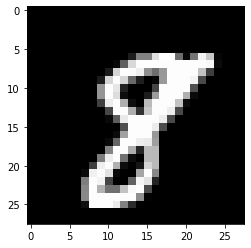

In [7]:
plt.imshow(x_train[55],cmap='gray')

In [8]:
y_train[55]

8

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
from tensorflow.keras.utils import to_categorical

## converting into vector format as tensoflow takes vector formats

In [12]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

### vector representation of number 8 i.e indexed at 55th position

In [15]:
y_train[55]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

### Normalising data(max(x)-min(x))

In [17]:
x_train=x_train/255
x_test=x_test/255

### As CNN accepts only images so we have to add the third dimension,we will add dummy dimension

In [18]:
x_train=x_train[:,:,:,None]
x_test=x_test[:,:,:,None]

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [36]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [37]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.6867 - accuracy: 0.7993 - val_loss: 0.3306 - val_accuracy: 0.9014
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3042 - accuracy: 0.9095 - val_loss: 0.2484 - val_accuracy: 0.9220
Epoch 3/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.2376 - accuracy: 0.9287 - val_loss: 0.2036 - val_accuracy: 0.9392
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1965 - accuracy: 0.9401 - val_loss: 0.1701 - val_accuracy: 0.9483
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1697 - accuracy: 0.9485 - val_loss: 0.1495 - val_accuracy: 0.9565
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1489 - accuracy: 0.9549 - val_loss: 0.1388 - val_accuracy: 0.9574
Epoch 7/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1341 - accuracy: 0.9591 - val_loss: 0.1335 -

In [40]:
np.argmax(y_test[75])

7

In [41]:
np.argmax(model.predict(x_test[75][None,:]))

7

In [44]:
import matplotlib.pyplot as imshow

In [53]:
def show_imgs(x):
    plt.figure(1,figsize=(10,10))
    k=0
    for i in range(0,4):
        for j in range(0,4):
            plt.subplot2grid((4,4),(i,j))
            plt.title('Actual:'+str(np.argmax(y_test[k]))+'Predict:'+ str(np.argmax(model.predict(x_test[k][None,:]))))
            plt.imshow(np.squeeze(x[k]),cmap='gray')
            k=k+1
    plt.tight_layout()

Actual: [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5]
Predicted: [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5]


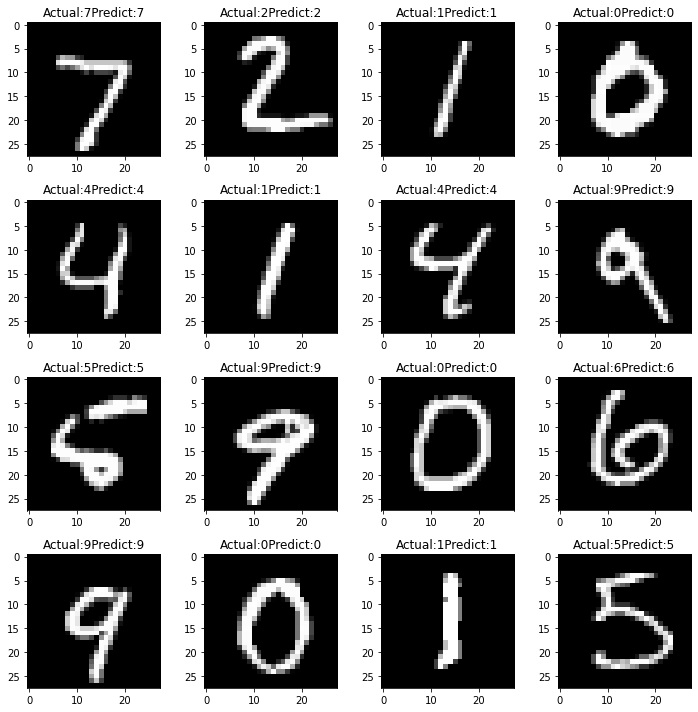

In [57]:
show_imgs(x_test[:16])
print('Actual:'  ,[x for x in np.argmax(y_test[:16],1)])
print('Predicted:'  ,[x for x in np.argmax(model.predict(x_test[:16]),1)])